# <center> Modelo ARIMA: guía completa para el pronóstico de series temporales en Python

Usando el modelo ARIMA, puede pronosticar una serie de tiempo usando los valores pasados ​​de la serie. En esta publicación, construimos un modelo ARIMA óptimo desde cero y lo extendemos a los modelos Seasonal ARIMA (SARIMA) y SARIMAX. También verás cómo construir modelos de autoarima en python

### Contenido
1. Introducción a la previsión de series temporales
2. Introducción a los modelos ARIMA
3. ¿Qué significa la p, d y q en el modelo ARIMA?
4.  son los modelos AR y MA?
5. Cómo encontrar el orden de diferenciación (d) en el modelo ARIMA
6. Cómo encontrar el orden del término AR (p)
7. Cómo encontrar el orden del término MA (q)
8. Cómo manejar si una serie de tiempo está ligeramente por debajo o por encima de la diferencia
9. Cómo construir el modelo ARIMA
10. Cómo encontrar el modelo ARIMA óptimo manualmente utilizando la validación cruzada fuera de tiempo
11. Métricas de precisión para el pronóstico de series temporales
12. Cómo hacer el pronóstico automático de Arima en Python
13. Cómo interpretar las parcelas residuales en el modelo ARIMA
14. Cómo construir automáticamente el modelo SARIMA en python
15. Cómo construir el modelo SARIMAX con variable exógena
16. Ejercicios de práctica
17. Conclusión

## 1. Introducción a la previsión de series temporales
Una serie temporal es una secuencia en la que se registra una métrica en intervalos de tiempo regulares.

Dependiendo de la frecuencia, una serie de tiempo puede ser anual (por ejemplo, presupuesto anual), trimestral (por ejemplo, gastos), mensual (por ejemplo, tráfico aéreo), semanal (por ejemplo, cantidad de ventas), diaria (por ejemplo, clima), por hora. (p. ej., precio de las acciones), minutos (p. ej., llamadas entrantes en un galope de llamadas) e incluso segundos (p. ej., tráfico web).

La previsión es el siguiente paso en el que desea predecir los valores futuros que tomará la serie.

**Pero ¿por qué pronosticar?**

Porque pronosticar una serie temporal (como la demanda y las ventas) suele tener un valor comercial tremendo.

En la mayoría de las empresas manufactureras, impulsa las actividades fundamentales de planificación comercial, compras y producción. Cualquier error en los pronósticos se reflejará en toda la cadena de suministro o en cualquier contexto comercial. Por lo tanto, es importante obtener pronósticos precisos para ahorrar costos y es fundamental para el éxito.

No solo en la fabricación, las técnicas y conceptos detrás de la previsión de series temporales son aplicables en cualquier negocio.

Ahora, el pronóstico de una serie de tiempo se puede dividir ampliamente en dos tipos.

Si usa solo los valores anteriores de la serie de tiempo para predecir sus valores futuros, se llama Pronóstico de serie de tiempo univariante .

Y si usa predictores que no sean la serie (también conocidas como variables exógenas) para pronosticar, se llama Pronóstico de series de tiempo de múltiples variables .

Esta publicación se enfoca en un tipo particular de método de pronóstico llamado modelado ARIMA .

ARIMA, abreviatura de 'Promedio Móvil Integrado AutoRegresivo', es un algoritmo de pronóstico basado en la idea de que la información en los valores pasados ​​de la serie de tiempo puede usarse sola para predecir los valores futuros.

## 3. Introducción a los Modelos ARIMA
Entonces, ¿qué es exactamente un modelo ARIMA?

ARIMA, abreviatura de 'Promedio móvil integrado regresivo automático', es en realidad una clase de modelos que 'explican' una serie de tiempo determinada en función de sus propios valores pasados, es decir, sus propios retrasos y los errores de pronóstico retrasados, por lo que se puede usar esa ecuación para pronosticar valores futuros.

Cualquier serie de tiempo 'no estacional' que muestre patrones y no sea un ruido blanco aleatorio se puede modelar con modelos ARIMA.

Un modelo ARIMA se caracteriza por 3 términos: p, d, q

dónde,

* p es el orden del término AR

* q es el orden del término MA

* d es el número de diferenciaciones requeridas para hacer que la serie de tiempo sea estacionaria

Si una serie temporal tiene patrones estacionales, debe agregar términos estacionales y se convierte en SARIMA, abreviatura de 'ARIMA estacional'. Más sobre eso una vez que terminemos ARIMA.

Entonces, ¿qué significa el 'orden del término AR'? Antes de ir allí, veamos primero el término 'd'.

## 3. ¿Qué significan las p, d y q en el modelo ARIMA?
El primer paso para construir un modelo ARIMA es hacer que la serie temporal sea estacionaria.

¿Por qué?

Porque el término 'Auto Regresivo' en ARIMA significa que es un modelo de regresión lineal que utiliza sus propios retrasos como predictores. Como sabe, los modelos de regresión lineal funcionan mejor cuando los predictores no están correlacionados y son independientes entre sí.

Entonces, ¿cómo hacer que una serie sea estacionaria?

El enfoque más común es diferenciarlo. Es decir, restar el valor anterior del valor actual. A veces, dependiendo de la complejidad de la serie, puede ser necesaria más de una diferenciación.

El valor de d, por tanto, es el número mínimo de diferenciaciones necesarias para que la serie sea estacionaria. Y si la serie temporal ya es estacionaria, entonces d = 0.

A continuación, ¿cuáles son los términos 'p' y 'q'?

'p' es el orden del término 'Auto Regresivo' (AR). Se refiere al número de retrasos de Y que se utilizarán como predictores. Y 'q' es el orden del término 'promedio móvil' (MA). Se refiere a la cantidad de errores de pronóstico retrasados ​​que deben incluirse en el modelo ARIMA.

## 4. ¿Qué son los modelos AR y MA?
Entonces, ¿qué son los modelos AR y MA? ¿Cuál es la fórmula matemática real para los modelos AR y MA?

Un modelo autorregresivo puro (solo AR) es aquel en el que Yt depende solo de sus propios retrasos. Es decir, Yt es una función de los 'retrasos de Yt'. 

<img src="https://www.machinelearningplus.com/wp-content/uploads/2019/02/Equation-1-min.png" alt="Imagen">


donde, Y{t-1} es el desfase1 de la serie, beta1 es el coeficiente de desfase1 que estima el modelo y `alpha` es el término de intercepción, también estimado por el modelo.

Del mismo modo, un modelo de promedio móvil puro (solo MA) es uno en el que Yt depende solo de los errores de pronóstico retrasados.


<img src="https://www.machinelearningplus.com/wp-content/uploads/2019/02/Equation-2-min.png" alt="Imagen">

donde los términos de error son los errores de los modelos autorregresivos de los rezagos respectivos. Los errores Et y E(t-1) son los errores de las siguientes ecuaciones:

<img src="https://www.machinelearningplus.com/wp-content/uploads/2019/02/Equation-3-min.png" alt="Imagen">

Esos fueron los modelos AR y MA respectivamente.

Entonces, ¿cómo es la ecuación de un modelo ARIMA?

Un modelo ARIMA es aquel en el que la serie temporal se diferenció al menos una vez para hacerla estacionaria y se combinan los términos AR y MA. Entonces la ecuación se convierte en:
<img src="https://www.machinelearningplus.com/wp-content/uploads/2019/02/Equation-4-min.png" alt="Imagen">

Modelo ARIMA en palabras:

Yt pronosticado = Constante + Combinación lineal Retrasos de Y (hasta p rezagos) + Combinación lineal de errores de pronóstico rezagados (hasta q rezagos)

El objetivo, por tanto, es identificar los valores de p, d y q. ¿Pero cómo?
Empecemos por encontrar la 'd'.

## 5. Cómo encontrar el orden de diferenciación (d) en el modelo ARIMA
La finalidad de diferenciarla para hacer estacionaria la serie temporal.

Pero debe tener cuidado de no diferenciar demasiado la serie. Porque una serie sobrediferenciada aún puede ser estacionaria, lo que a su vez afectará los parámetros del modelo.

Entonces, ¿cómo determinar el orden correcto de diferenciación?

El orden correcto de diferenciación es la diferenciación mínima requerida para obtener una serie casi estacionaria que se desplaza alrededor de una media definida y la gráfica ACF llega a cero bastante rápido.
Si las autocorrelaciones son positivas para muchos rezagos (10 o más), entonces la serie necesita más diferenciación. Por otro lado, si la autocorrelación del retardo 1 en sí misma es demasiado negativa, es probable que la serie esté sobrediferenciada.

En el caso de que realmente no pueda decidir entre dos órdenes de diferenciación, elija el orden que dé la menor desviación estándar en la serie diferenciada.

Veamos cómo hacerlo con un ejemplo.

Primero, voy a verificar si la serie es estacionaria utilizando la prueba de Dickey Fuller aumentada ( ), del paquete statsmodels.adfuller()

**¿Por qué?**

Porque solo necesita diferenciar si la serie no es estacionaria. De lo contrario, no se necesita diferenciación, es decir, d=0.

La hipótesis nula de la prueba ADF es que la serie temporal no es estacionaria. Entonces, si el valor p de la prueba es menor que el nivel de significancia (0.05), entonces rechaza la hipótesis nula e infiere que la serie de tiempo es estacionaria.

Entonces, en nuestro caso, si P Value > 0.05 continuamos con la búsqueda del orden de diferenciación.



In [3]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df.value.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -2.464240
p-value: 0.124419


Dado que el valor P es mayor que el nivel de significancia, diferenciemos las series y veamos cómo se ve el gráfico de autocorrelación.

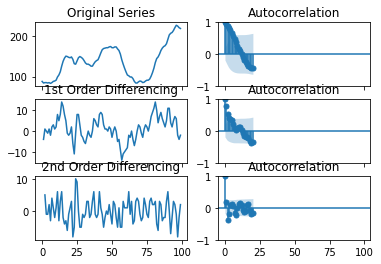

In [2]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Import data
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/wwwusage.csv', names=['value'], header=0)

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df.value); axes[0, 0].set_title('Original Series')
plot_acf(df.value, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df.value.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.value.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df.value.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.value.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

Para la serie anterior, la serie temporal alcanza la estacionariedad con dos órdenes de diferenciación. Pero al observar el gráfico de autocorrelación para la segunda diferenciación, el retraso pasa bastante rápido a la zona negativa lejana, lo que indica que la serie podría haber sido sobrediferenciada.

Por lo tanto, voy a fijar tentativamente el orden de diferenciación en 1, aunque la serie no es perfectamente estacionaria (estacionariedad débil).

In [5]:
pip install pmdarima


     ------------------------------------ 569.7/569.7 kB 497.3 kB/s eta 0:00:00
     ---------------------------------------- 2.8/2.8 MB 415.0 kB/s eta 0:00:00



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
from pmdarima.arima.utils import ndiffs
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/wwwusage.csv', names=['value'], header=0)
y = df.value

## Adf Test
ndiffs(y, test='adf')  # 2

# KPSS test
ndiffs(y, test='kpss')  # 0

# PP test:
ndiffs(y, test='pp')  # 2

2

## 6. Cómo encontrar el orden del término AR (p)
El siguiente paso es identificar si el modelo necesita algún término AR. Puede averiguar el número necesario de términos AR inspeccionando el gráfico de autocorrelación parcial (PACF).

Pero, ¿qué es PACF?

La autocorrelación parcial se puede imaginar como la correlación entre la serie y su rezago, después de excluir las contribuciones de los rezagos intermedios. Entonces, PACF transmite la correlación pura entre un retraso y la serie. De esa manera, sabrá si ese retraso es necesario en el término AR o no.
Entonces, ¿cuál es matemáticamente la fórmula para PACF?

La autocorrelación parcial del retraso (k) de una serie es el coeficiente de ese retraso en la ecuación de autorregresión de Y.

Ecuación de autorregresión
Es decir, supongamos que si
Y_tes la serie actual y es el rezago 1 de , entonces la autocorrelación parcial del rezago 3 ( ) es el coeficiente $\alpha_3$ de en la ecuación anterior.Y_t-1YY_t-3Y_t-3

Bien. Ahora, ¿cómo encontrar el número de términos AR?

Cualquier autocorrelación en una serie estacionaria puede rectificarse agregando suficientes términos AR. Entonces, inicialmente tomamos el orden del término AR para que sea igual a tantos retrasos que crucen el límite de significación en la gráfica PACF.

c:\Users\tesbh\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


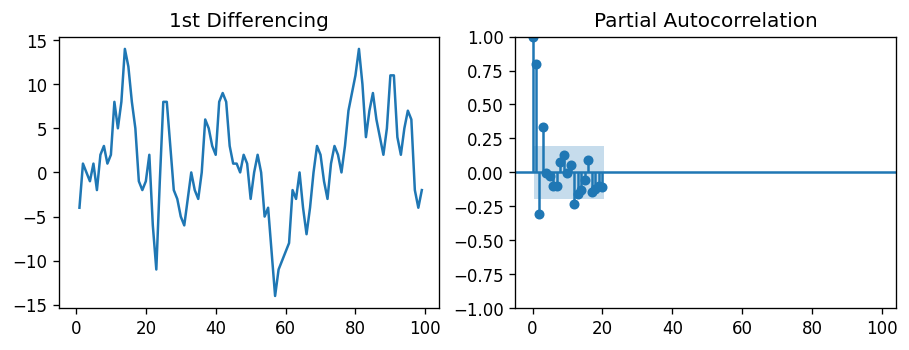

In [7]:
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.value.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(df.value.diff().dropna(), ax=axes[1])

plt.show()